In [56]:
import keras
import numpy as np 
import requests
import datetime
import pandas as pd
import pandas_datareader.data as reader
from sklearn.svm import SVR
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style


style.use('ggplot')
start = datetime.datetime(2018,1,1)
end = datetime.datetime.today()
# start = datetime.datetime(2020,3,11)
# end = datetime.datetime(2020,8,1)
# end = datetime.date.today()
df = reader.DataReader("TSLA", 'yahoo', start, end)
# sort by date
df = df.sort_values('Date')
df = df.sort_values('Date')

# fix the date 
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)

def accessGrant():
    stripped = ""
    # adding noise to the data process:
    # data[::5] += 3 * (0.5 - np.random.rand(5))
    # accessfile = open("access.txt","r")
    with open("access.txt","r") as access:
            line = access.readline()
            cnt = 1
            while line:
                if ("finnhub" in line):
                    print(f'Line {cnt}: {line.strip("finnhub=~")}')
                stripped = line.strip("finnhub=~")
                line = access.readline()
                cnt += 1
                if(cnt>2):
                    break

def unixTimeStamp():
    timenow = datetime.datetime.now()
    epoch = datetime.datetime.utcfromtimestamp(0)
    value = (timenow - epoch).total_seconds() * 1000.0
    return(value,timenow)

def genWebHook():
    r = requests.post('https://finnhub.io/api/v1/webhook/add?token=', stripped , json={'event': 'earnings', 'symbol': 'TSLA'})
    res = r.json() # limit 30/sec base
    print(res)

def main():
    utc , _ = unixTimeStamp()
    print(utc)
    print(df.columns)
    # genWebHook()
if __name__ == "__main__":
    main()

# quandl.ApiConfig.api_key = contents
# data = quandl.get('WIKI/TSLA', start_date='2019-12-26', end_date='2020-7-28')
# tsla = quandl.get("EOD/TSLA")
# print(tsla.head())

1598413169843.291
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [57]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,322.109985,311.000000,312.000000,320.529999,4352200,320.529999
2018-01-03,325.250000,315.549988,321.000000,317.250000,4521500,317.250000
2018-01-04,318.549988,305.679993,312.869995,314.619995,9946300,314.619995
2018-01-05,317.239990,312.000000,316.619995,316.579987,4591200,316.579987
2018-01-08,337.019989,315.500000,316.000000,336.410004,9859400,336.410004
...,...,...,...,...,...,...
2020-08-19,1911.000000,1841.209961,1865.000000,1878.530029,12205300,1878.530029
2020-08-20,2021.989990,1857.060059,1860.680054,2001.829956,20611800,2001.829956
2020-08-21,2095.489990,2025.050049,2044.760010,2049.979980,21489600,2049.979980


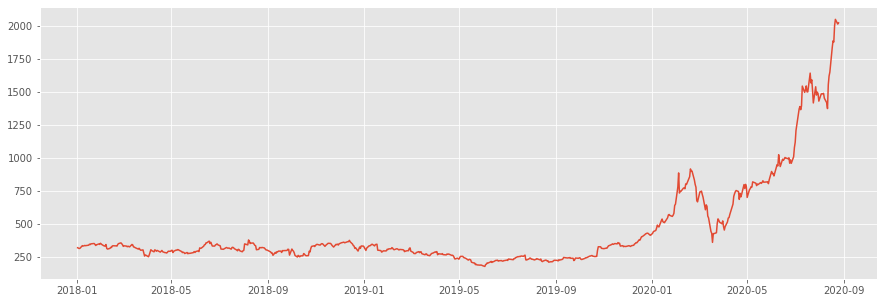

In [58]:
plt.figure(figsize = (15,5))
plt.plot(df["Adj Close"])

In [59]:
storeAdjClose = df['Adj Close']
mavg = storeAdjClose.rolling(window=100).mean()

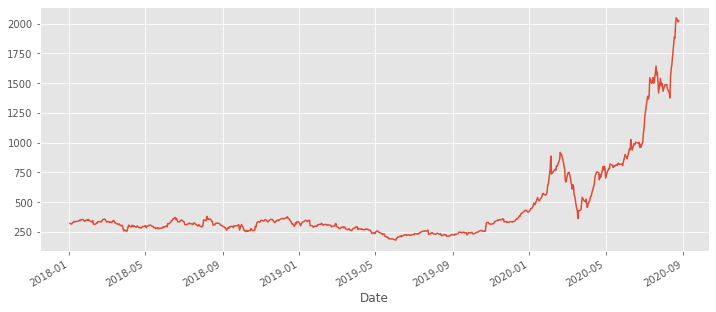

In [60]:
plt.figure(figsize = (12,5))
storeAdjClose.plot()

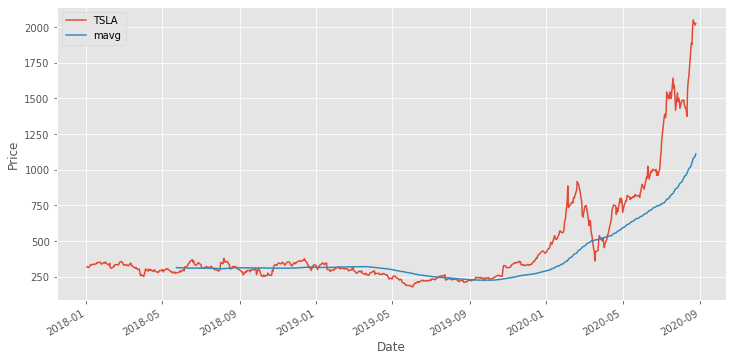

In [61]:
plt.figure(figsize = (12,6))
storeAdjClose.plot(label='TSLA')
mavg.plot(label='mavg')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [62]:

dates_df = df.copy()
dates_df = dates_df.reset_index()

org_dates = dates_df['Date']

dates_df['Date'] = dates_df['Date'].map(mdates.date2num)

dates_df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
662,737656.0,1911.000000,1841.209961,1865.000000,1878.530029,12205300,1878.530029
663,737657.0,2021.989990,1857.060059,1860.680054,2001.829956,20611800,2001.829956
664,737658.0,2095.489990,2025.050049,2044.760010,2049.979980,21489600,2049.979980
665,737661.0,2129.000000,1927.520020,2126.280029,2014.199951,20063600,2014.199951
666,737662.0,2027.949951,1968.000000,1974.890015,2023.339966,10584300,2023.339966


/Users/shanmukhasurapuraju/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


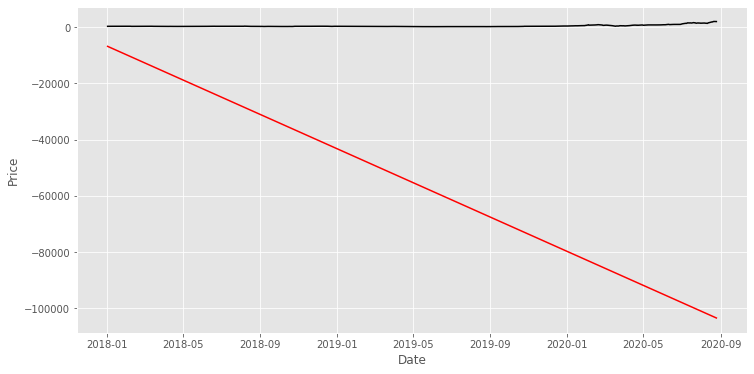

In [63]:
# kernels are used to map lower dimention datapoints to a high dimentional data space
dates = dates_df['Date'].to_numpy()
prices = df['Adj Close'].to_numpy()
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))
svrTickerLinear = SVR(kernel= 'linear')
svrTickerLinear.fit(dates, prices)
plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svrTickerLinear.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


/Users/shanmukhasurapuraju/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


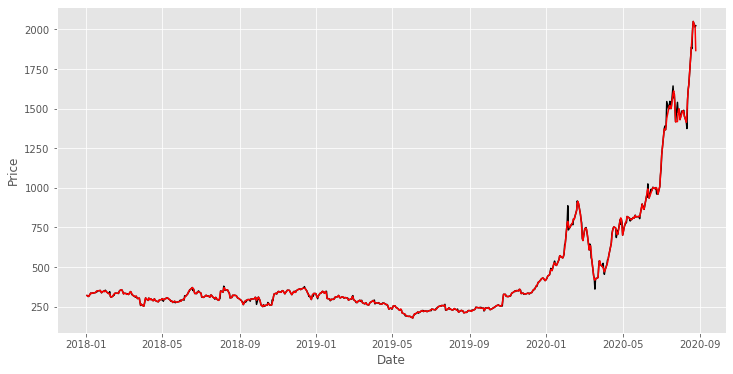

In [64]:
svrTickerRBF = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
svrTickerRBF.fit(dates, prices)
plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svrTickerRBF.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

/Users/shanmukhasurapuraju/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


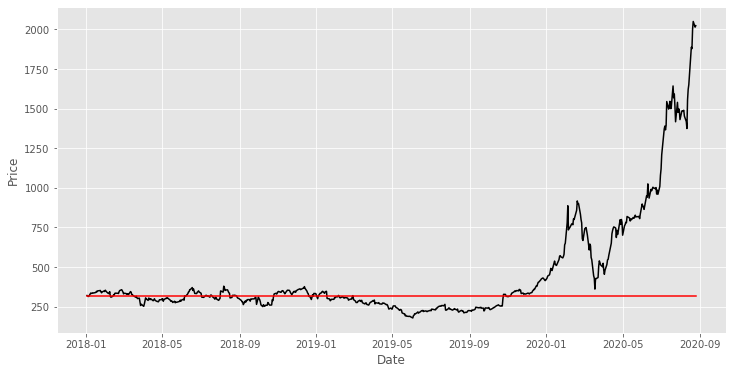

In [65]:
svrTicker = SVR(kernel= 'sigmoid')
svrTicker.fit(dates, prices)
plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svrTicker.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()